2.3 Feature Selection

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the notebook
notebook_path = '/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books'

# Create the directory if it doesn't exist
os.makedirs(notebook_path, exist_ok=True)

print(f"Directory created or already exists: {notebook_path}")

# Note: Saving the notebook programmatically requires additional steps that depend on your environment
# In a standard Colab environment, you typically save the notebook manually through the 'File' menu.
# If you are in a different environment or need programmatic saving, you might need to use specific APIs or libraries.

Mounted at /content/drive
Directory created or already exists: /drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/processed_heart_disease.csv')

# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

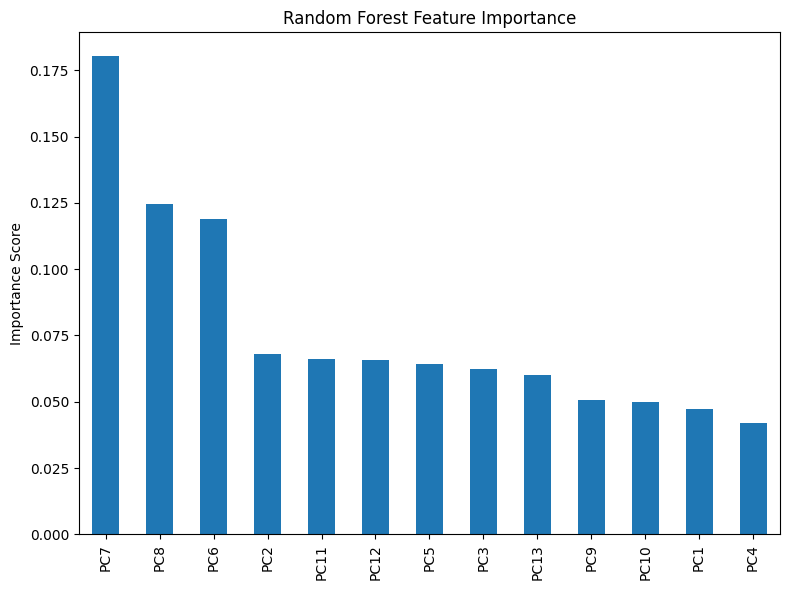

In [3]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random Forest feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
importances_rf = rf.feature_importances_

# Feature importance ranking
feature_importance_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(8,6))
feature_importance_rf.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

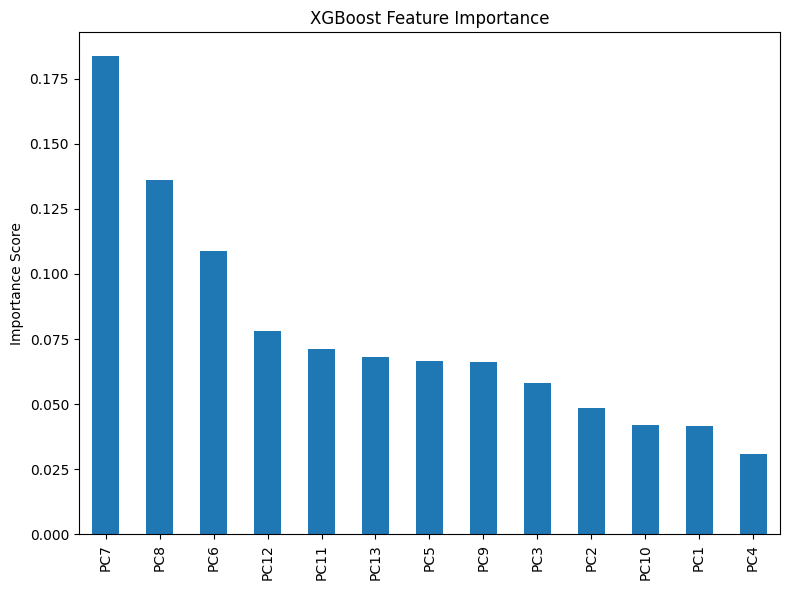

In [4]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_scaled, y)
importances_xgb = xgb.feature_importances_
feature_importance_xgb = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance_xgb.plot(kind='bar')
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5)
rfe.fit(X_scaled, y)
selected_rfe = X.columns[rfe.support_]
print("Top features by RFE:", list(selected_rfe))

Top features by RFE: ['PC6', 'PC7', 'PC8', 'PC11', 'PC12']


In [6]:
from sklearn.feature_selection import SelectKBest, chi2

# For chi2, use unscaled, non-negative data (if you have negative values, remove scaling or use MinMaxScaler)
X_minmax = (X - X.min()) / (X.max() - X.min())
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_minmax, y)
selected_chi2 = X.columns[chi2_selector.get_support()]
print("Top features by Chi-Square:", list(selected_chi2))

Top features by Chi-Square: ['PC6', 'PC7', 'PC8', 'PC11', 'PC12']


In [7]:
# Combine selected features (union or intersection)
selected_features = set(feature_importance_rf.head(5).index) | set(selected_rfe) | set(selected_chi2)
selected_features = list(selected_features)
print("Final selected features for modeling:", selected_features)

# Reduced dataset
X_reduced = X[selected_features]
df_reduced = pd.concat([X_reduced, y], axis=1)
df_reduced.to_csv('/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/reduced_heart_disease.csv', index=False)

Final selected features for modeling: ['PC2', 'PC6', 'PC12', 'PC11', 'PC7', 'PC8']


Principal Components are new features that are created from your original features using Principal Component Analysis (PCA).
They are linear combinations of the original variables, designed to capture the most variance (information) in the data with fewer dimensions.
PC1 is the first principal component, explaining the largest possible variance.
PC2 is the second principal component, orthogonal to PC1, and explains the next largest variance, and so on.